TITANIC DATASET

In [53]:
import numpy as np
import pandas as pd


In [54]:
from sklearn import tree



In [55]:
from sklearn import preprocessing

In [56]:
df=pd.read_csv("titanic_eda/train.csv")

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df["Age"].mean()

29.69911764705882

In [59]:
new_age=np.where(df["Age"].isnull(),29,df["Age"])

In [60]:
df["Age"]=new_age

In [61]:
label_encoder=preprocessing.LabelEncoder()


In [80]:
encoded_sex=label_encoder.fit_transform(df["Sex"])


In [81]:
tree_model=tree.DecisionTreeClassifier()


In [83]:
 tree_model.fit(X=pd.DataFrame(encoded_sex),y=df["Survived"])



DecisionTreeClassifier()

In [88]:
# with open ("DTree4.dot","w") as f:
#     f=tree.export_graphviz(tree_model,feature_names=["Age"],out_file=f)

In [89]:
predict=pd.DataFrame([encoded_sex,df["Age"],df["Fare"]]).T

In [90]:
tree_model=tree.DecisionTreeClassifier(max_depth=6)


In [91]:
tree_model.fit(X=predict,y=df["Survived"]) 

DecisionTreeClassifier(max_depth=6)

In [92]:
with open ("DTree4.dot","w") as f:
    f=tree.export_graphviz(tree_model,feature_names=["Age","Sex","Fare"],out_file=f)

In [93]:
tree_model.score(X=predict,y=df["Survived"])

0.8249158249158249

In [129]:
df_test=pd.read_csv("titanic_eda/test.csv")

In [130]:
new_age=np.where(df_test["Age"].isnull(),29,df_test["Age"])

In [139]:
df_test["Age"]=new_age
df_test["Fare"].mean()

35.627188489208635

In [140]:
new_fare=np.where(df_test["Fare"].isnull(),35,df_test["Fare"])
df_test["Fare"]=new_fare

In [141]:
encoded_sexx=label_encoder.fit_transform(df_test["Sex"])

In [142]:
test_features=pd.DataFrame([encoded_sexx,df_test["Age"],df_test["Fare"]]).T

In [143]:
test_predict=tree_model.predict(X=test_features)

In [145]:
predict_output=pd.DataFrame({"PassengerId":df_test["PassengerId"],"Survived":test_predict})

In [160]:
predict_output.to_csv("output_assignment.csv",index=False)

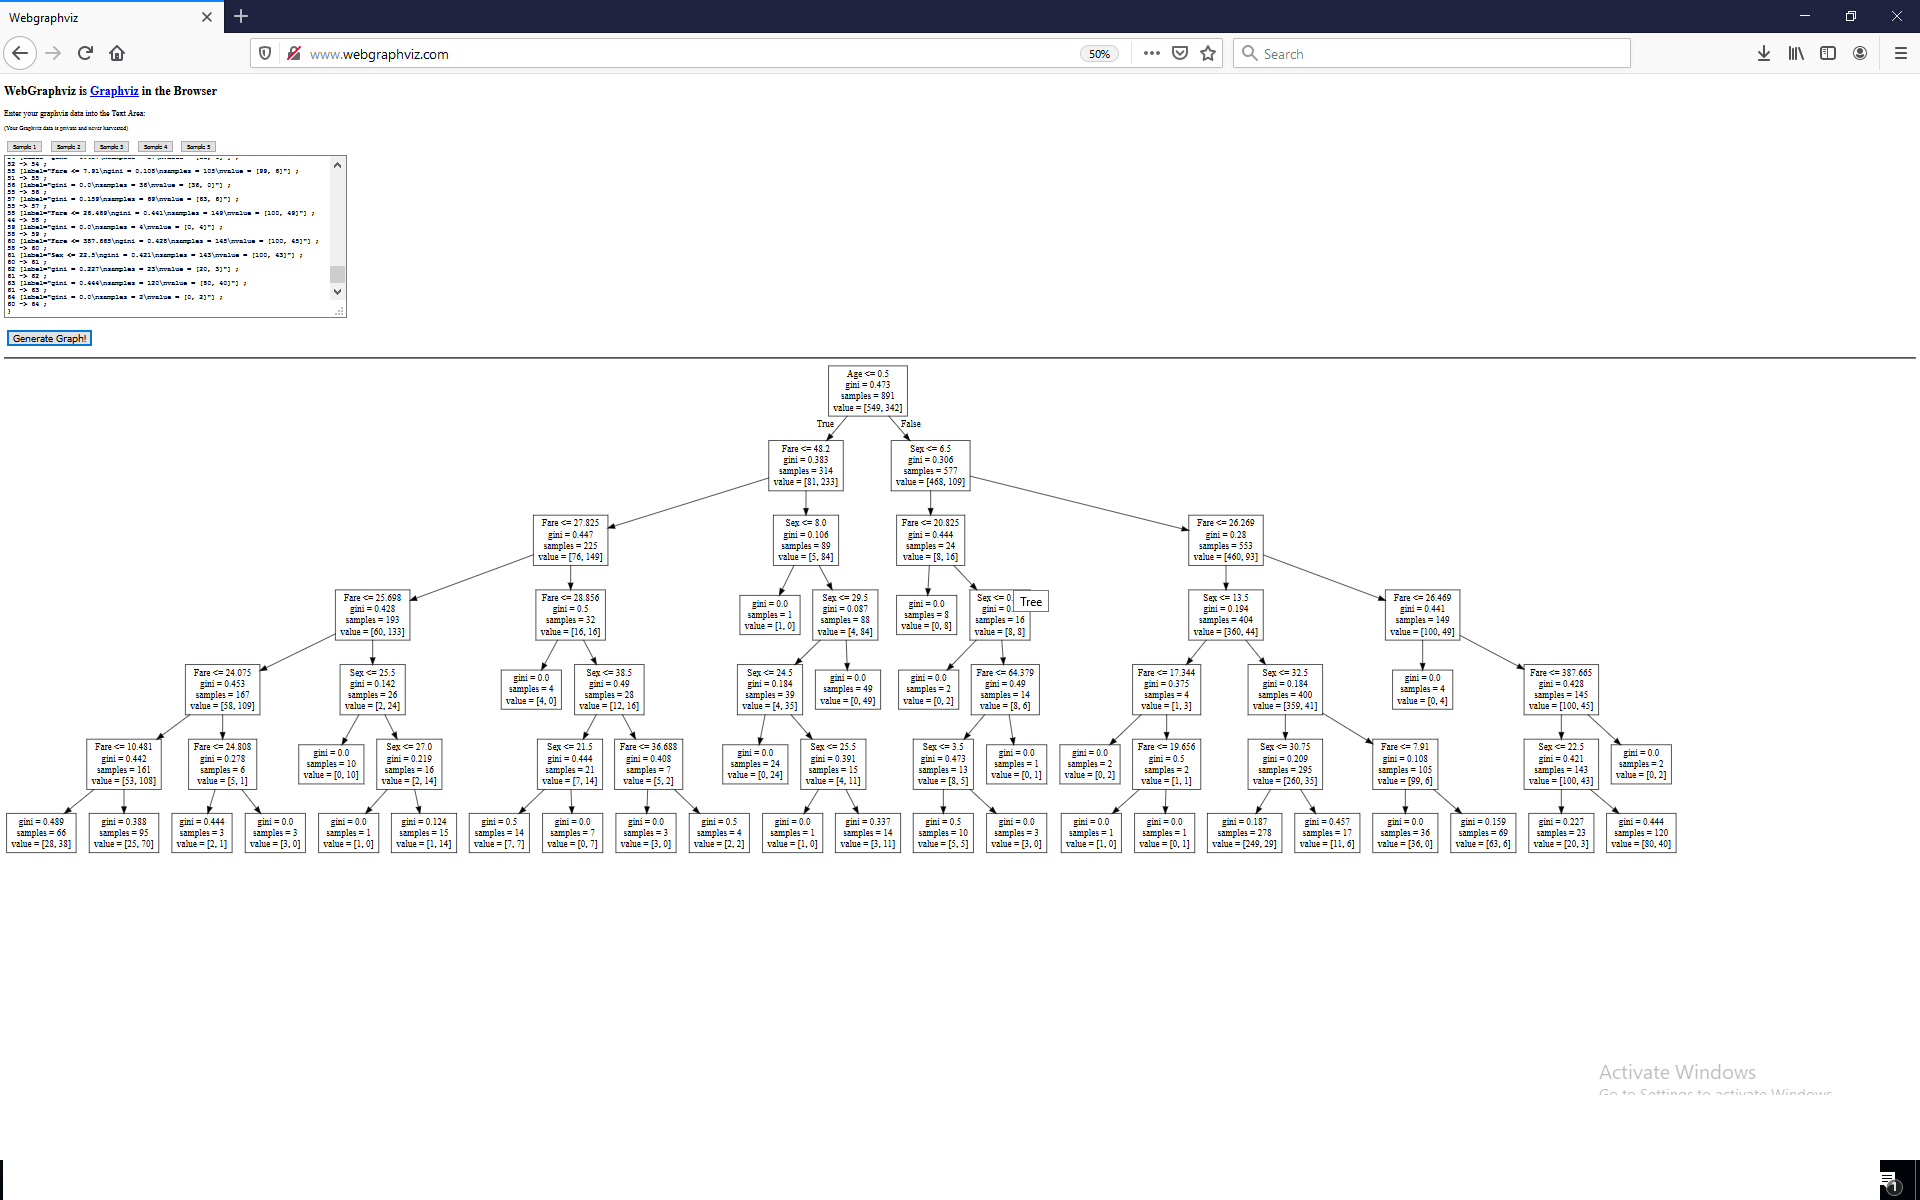

In [5]:
from IPython.display import Image
Image("titanicdataset_output.png")